In [98]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import talib as tal
import ta
import hvplot.pandas
import matplotlib.pyplot as plt
from matplotlib import gridspec
import panel as pn

In [99]:
#Select stocks
tickers = ['AAPL', 'F', 'BAC']

In [100]:
#Select period - pre-GFC and post-GFC
start = '2007, 1, 1'
end = '2015, 1, 1'

In [101]:
stocks = []
for ticker in tickers:
    stock = web.get_data_yahoo(ticker, start=start, end=end)['Adj Close'].reset_index()
    stock = stock.set_index('Date')
    stocks.append(stock)

In [102]:
#SMA
def sma(df):
    df['MA20'] = df['Adj Close'].rolling(20).mean()
    df['MA50'] = df['Adj Close'].rolling(50).mean()
    
    buy = []
    sell = []

    for i in range(len(df)):       
        if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
            buy.append(i)
        elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
            sell.append(i)
    
    return buy, sell

In [103]:
#MACD
def macd(df):
    stock['MACD'], stock['MACD signal'], macdhist = tal.MACD(stock['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    buy = []
    sell = []

    for i in range(len(stock)):
        if (stock['MACD'].iloc[i] > stock['MACD signal'].iloc[i]) & (stock['MACD'].iloc[i-1] < stock['MACD signal'].iloc[i-1]):
            buy.append(i)
        elif (stock['MACD'].iloc[i] < stock['MACD signal'].iloc[i]) & (stock['MACD'].iloc[i-1] > stock['MACD signal'].iloc[i-1]):
            sell.append(i)
    
    return buy, sell

In [104]:
#RSI
def rsi(df):
    df['SMA200'] = ta.trend.sma_indicator(df['Adj Close'], window=200)
    df['RSI'] = ta.momentum.rsi(df['Adj Close'], window=10)
    df['Signal'] = np.where((df['Adj Close'] > df['SMA200']) & (df.RSI < 30), True, False)

    buy = []
    sell = []

    for i in range(len(df)):
        if df.Signal.iloc[i]:
            buy.append(i + 1)
            for j in range (1,11):
                if df['RSI'].iloc[i + j] > 40:
                    sell.append(i + j + 1)
                    break
                
                elif j == 10:
                    sell.append(i + j + 1)
    return buy, sell

In [105]:
#Price move charts with buy/sell signals

#Apple

#SMA price chart
def apple_sma():
        buy, sell = sma(stocks[0])
        fig = plt.figure(figsize=(15, 7))
        plt.plot(stocks[0]['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)
        plt.plot(stocks[0]['MA20'], label='MA20', c='black', alpha=0.9)
        plt.plot(stocks[0]['MA50'], label='MA50', c='magenta', alpha=0.9)
        plt.scatter(stocks[0].iloc[buy].index,stocks[0].iloc[buy]['Adj Close'], marker='^', c='green', s=100)
        plt.scatter(stocks[0].iloc[sell].index,stocks[0].iloc[sell]['Adj Close'], marker='v', c='red', s=100)
        plt.legend()
        plt.close()
        return fig
    
#MACD price chart       
def apple_macd():
        buy, sell = macd(stocks[0])
        fig = plt.figure(figsize=(15, 7))
        spec = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[1.5, 1])
        ax0 = fig.add_subplot(spec[0])
        ax0.plot(stocks[0]['Adj Close'])
        ax0.legend(['Asset Price'])
        ax1 = fig.add_subplot(spec[1])
        ax1.plot(stocks[0][['MACD', 'MACD signal']])
        ax1.scatter(stocks[0].iloc[buy].index, stocks[0].iloc[buy]['MACD'], marker='^', c='green', s=100)
        ax1.scatter(stocks[0].iloc[sell].index, stocks[0].iloc[sell]['MACD'], marker='v', c='red', s=100)
        ax1.legend(['MACD', 'MACD signal'])
        plt.subplots_adjust(hspace=0)
        plt.close()
        return fig

#RSI price chart
def apple_rsi():
        buy, sell = rsi(stocks[0])
        fig = plt.figure(figsize=(15, 7))
        plt.scatter(stocks[0].iloc[buy].index, 
                stocks[0].iloc[buy]['Adj Close'], 
                marker='^', 
                c='b')

        plt.scatter(stocks[0].iloc[sell].index, 
                stocks[0].iloc[sell]['Adj Close'], 
                marker='v', 
                c='r')

        plt.plot(stocks[0]['Adj Close'])
        plt.close()
        return fig

#Ford
    
#SMA price chart
def ford_sma():
        buy, sell = sma(stocks[1])
        fig = plt.figure(figsize=(15, 7))
        plt.plot(stocks[1]['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)
        plt.plot(stocks[1]['MA20'], label='MA20', c='black', alpha=0.9)
        plt.plot(stocks[1]['MA50'], label='MA50', c='magenta', alpha=0.9)
        plt.scatter(stocks[1].iloc[buy].index,stocks[1].iloc[buy]['Adj Close'], marker='^', c='green', s=100)
        plt.scatter(stocks[1].iloc[sell].index,stocks[1].iloc[sell]['Adj Close'], marker='v', c='red', s=100)
        plt.legend()
        plt.close()
        return fig

#MACD price chart
def ford_macd():
        buy, sell = macd(stocks[1])
        fig = plt.figure(figsize=(15, 7))
        spec = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[1.5, 1])
        ax0 = fig.add_subplot(spec[0])
        ax0.plot(stocks[1]['Adj Close'])
        ax0.legend(['Asset Price'])
        ax1 = fig.add_subplot(spec[1])
        ax1.plot(stocks[1][['MACD', 'MACD signal']])
        ax1.scatter(stocks[1].iloc[buy].index, stocks[1].iloc[buy]['MACD'], marker='^', c='green', s=100)
        ax1.scatter(stocks[1].iloc[sell].index, stocks[1].iloc[sell]['MACD'], marker='v', c='red', s=100)
        ax1.legend(['MACD', 'MACD signal'])
        plt.subplots_adjust(hspace=0)
        plt.close()
        return fig
    
#RSI price chart
def ford_rsi():
        buy, sell = rsi(stocks[1])
        fig = plt.figure(figsize=(15, 7))
        plt.scatter(stocks[1].iloc[buy].index, 
                stocks[1].iloc[buy]['Adj Close'], 
                marker='^', 
                c='b')

        plt.scatter(stocks[1].iloc[sell].index, 
                stocks[1].iloc[sell]['Adj Close'], 
                marker='v', 
                c='r')

        plt.plot(stocks[1]['Adj Close'])
        plt.close()
        return fig

#Bank of America
    
#SMA price chart
def bac_sma():
        buy, sell = sma(stocks[2])
        fig = plt.figure(figsize=(15, 7))
        plt.plot(stocks[2]['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)
        plt.plot(stocks[2]['MA20'], label='MA20', c='black', alpha=0.9)
        plt.plot(stocks[2]['MA50'], label='MA50', c='magenta', alpha=0.9)
        plt.scatter(stocks[2].iloc[buy].index,stocks[2].iloc[buy]['Adj Close'], marker='^', c='green', s=100)
        plt.scatter(stocks[2].iloc[sell].index,stocks[2].iloc[sell]['Adj Close'], marker='v', c='red', s=100)
        plt.legend()
        plt.close()
        return fig

#MACD price chart
def bac_macd():
        buy, sell = macd(stocks[2])
        fig = plt.figure(figsize=(15, 7))
        spec = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[1.5, 1])
        ax0 = fig.add_subplot(spec[0])
        ax0.plot(stocks[2]['Adj Close'])
        ax0.legend(['Asset Price'])
        ax1 = fig.add_subplot(spec[1])
        ax1.plot(stocks[2][['MACD', 'MACD signal']])
        ax1.scatter(stocks[2].iloc[buy].index, stocks[2].iloc[buy]['MACD'], marker='^', c='green', s=100)
        ax1.scatter(stocks[2].iloc[sell].index, stocks[2].iloc[sell]['MACD'], marker='v', c='red', s=100)
        ax1.legend(['MACD', 'MACD signal'])
        plt.subplots_adjust(hspace=0)
        plt.close()
        return fig

#RSI price chart
def bac_rsi():
        buy, sell = rsi(stocks[2])
        fig = plt.figure(figsize=(15, 7))
        plt.scatter(stocks[2].iloc[buy].index, 
                stocks[2].iloc[buy]['Adj Close'], 
                marker='^', 
                c='b')

        plt.scatter(stocks[2].iloc[sell].index, 
                stocks[2].iloc[sell]['Adj Close'], 
                marker='v', 
                c='r')
        
        plt.plot(stocks[2]['Adj Close'])
        plt.close()
        return fig

In [106]:
#Absonute returns & win rates

returns = []
wins = []

for stock in stocks:
    
    sma_buy, sma_sell = sma(stock)
    if len(sma_buy) > len(sma_sell):
        sma_buy = np.delete(sma_buy, 0)    
    elif len(sma_buy) < len(sma_sell):
        sma_sell = np.delete(sma_sell, 0)
    sma_ret = (stock.iloc[sma_sell]['Adj Close'].values - stock.iloc[sma_buy]['Adj Close'].values) / stock.iloc[sma_buy]['Adj Close'].values
    sma_cum_return = (pd.Series(sma_ret) + 1).cumprod().iloc[-1] - 1
    sma_wins = [i for i in sma_ret if i > 0]
    sma_win_rate = len(sma_wins) / len(sma_ret)
    
    macd_buy, macd_sell = macd(stock)
    if len(macd_buy) > len(macd_sell):
        macd_buy = np.delete(macd_buy, 0)    
    elif len(macd_buy) < len(macd_sell):
        macd_sell = np.delete(macd_sell, 0)
    macd_ret = (stock.iloc[macd_sell]['Adj Close'].values - stock.iloc[macd_buy]['Adj Close'].values) / stock.iloc[macd_buy]['Adj Close'].values
    macd_cum_return = (pd.Series(macd_ret) + 1).cumprod().iloc[-1] - 1
    macd_ret = (stock.iloc[macd_sell]['Adj Close'].values - stock.iloc[macd_buy]['Adj Close'].values) / stock.iloc[macd_buy]['Adj Close'].values
    macd_cum_return = (pd.Series(macd_ret) + 1).cumprod().iloc[-1] - 1
    macd_wins = [i for i in macd_ret if i > 0]
    macd_win_rate = len(macd_wins) / len(macd_ret)
    
    rsi_buy, rsi_sell = rsi(stock)
    rsi_ret = (stock.iloc[rsi_sell]['Adj Close'].values - stock.iloc[rsi_buy]['Adj Close'].values) / stock.iloc[rsi_buy]['Adj Close'].values
    rsi_cum_return = (pd.Series(rsi_ret) + 1).cumprod().iloc[-1] - 1
    rsi_wins = [i for i in rsi_ret if i > 0]
    rsi_win_rate = len(rsi_wins) / len(rsi_ret)
    
    buy_hold = (stock['Adj Close'].pct_change() + 1).cumprod().iloc[-1] - 1
    
    cum_rets = pd.DataFrame([sma_cum_return, macd_cum_return, rsi_cum_return, buy_hold], index=['SMA', 'MACD', 'RSI', 'Buy & Hold'])
    returns.append(cum_rets)
    
    win_rates = pd.DataFrame([sma_win_rate, macd_win_rate, rsi_win_rate], index=['SMA', 'MACD', 'RSI'])
    wins.append(win_rates)
    

Tabs
    [0] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [1] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [3] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
    [4] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
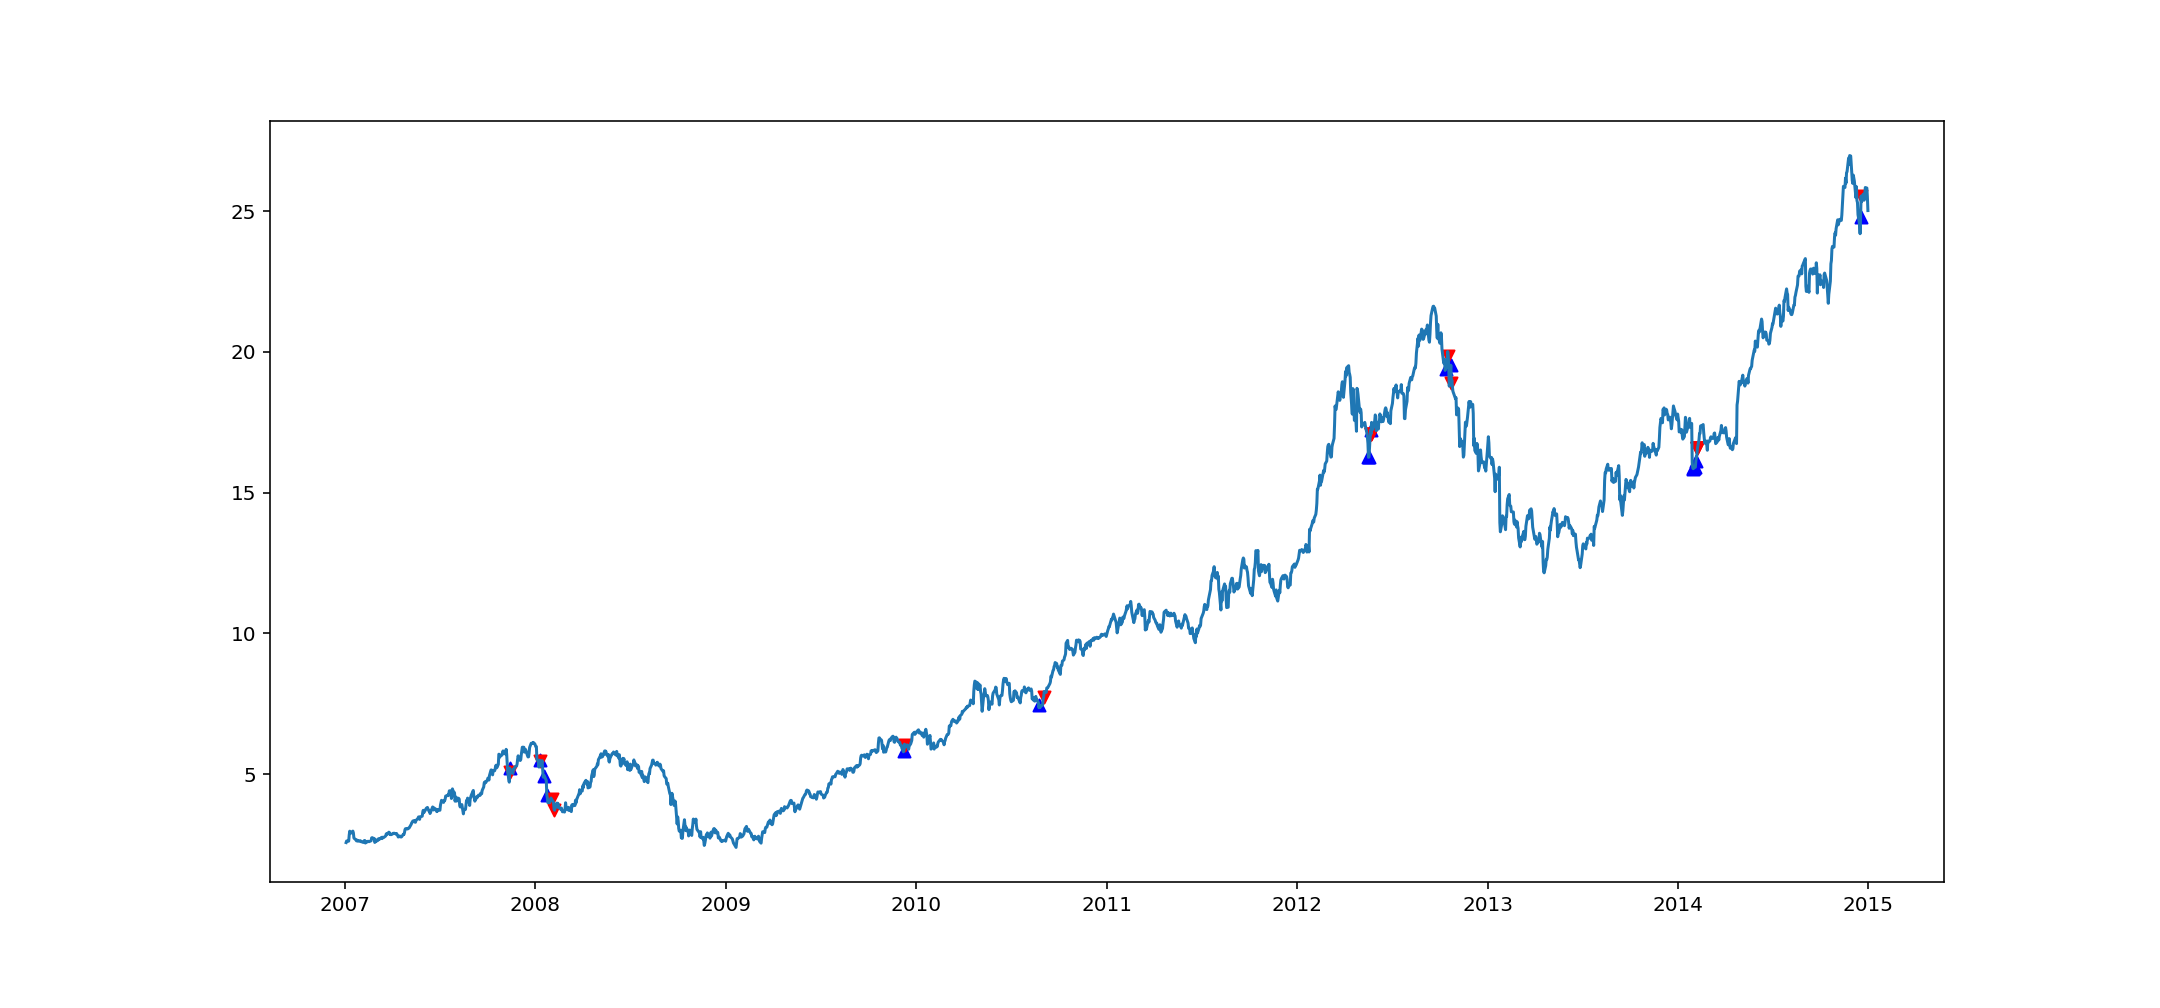
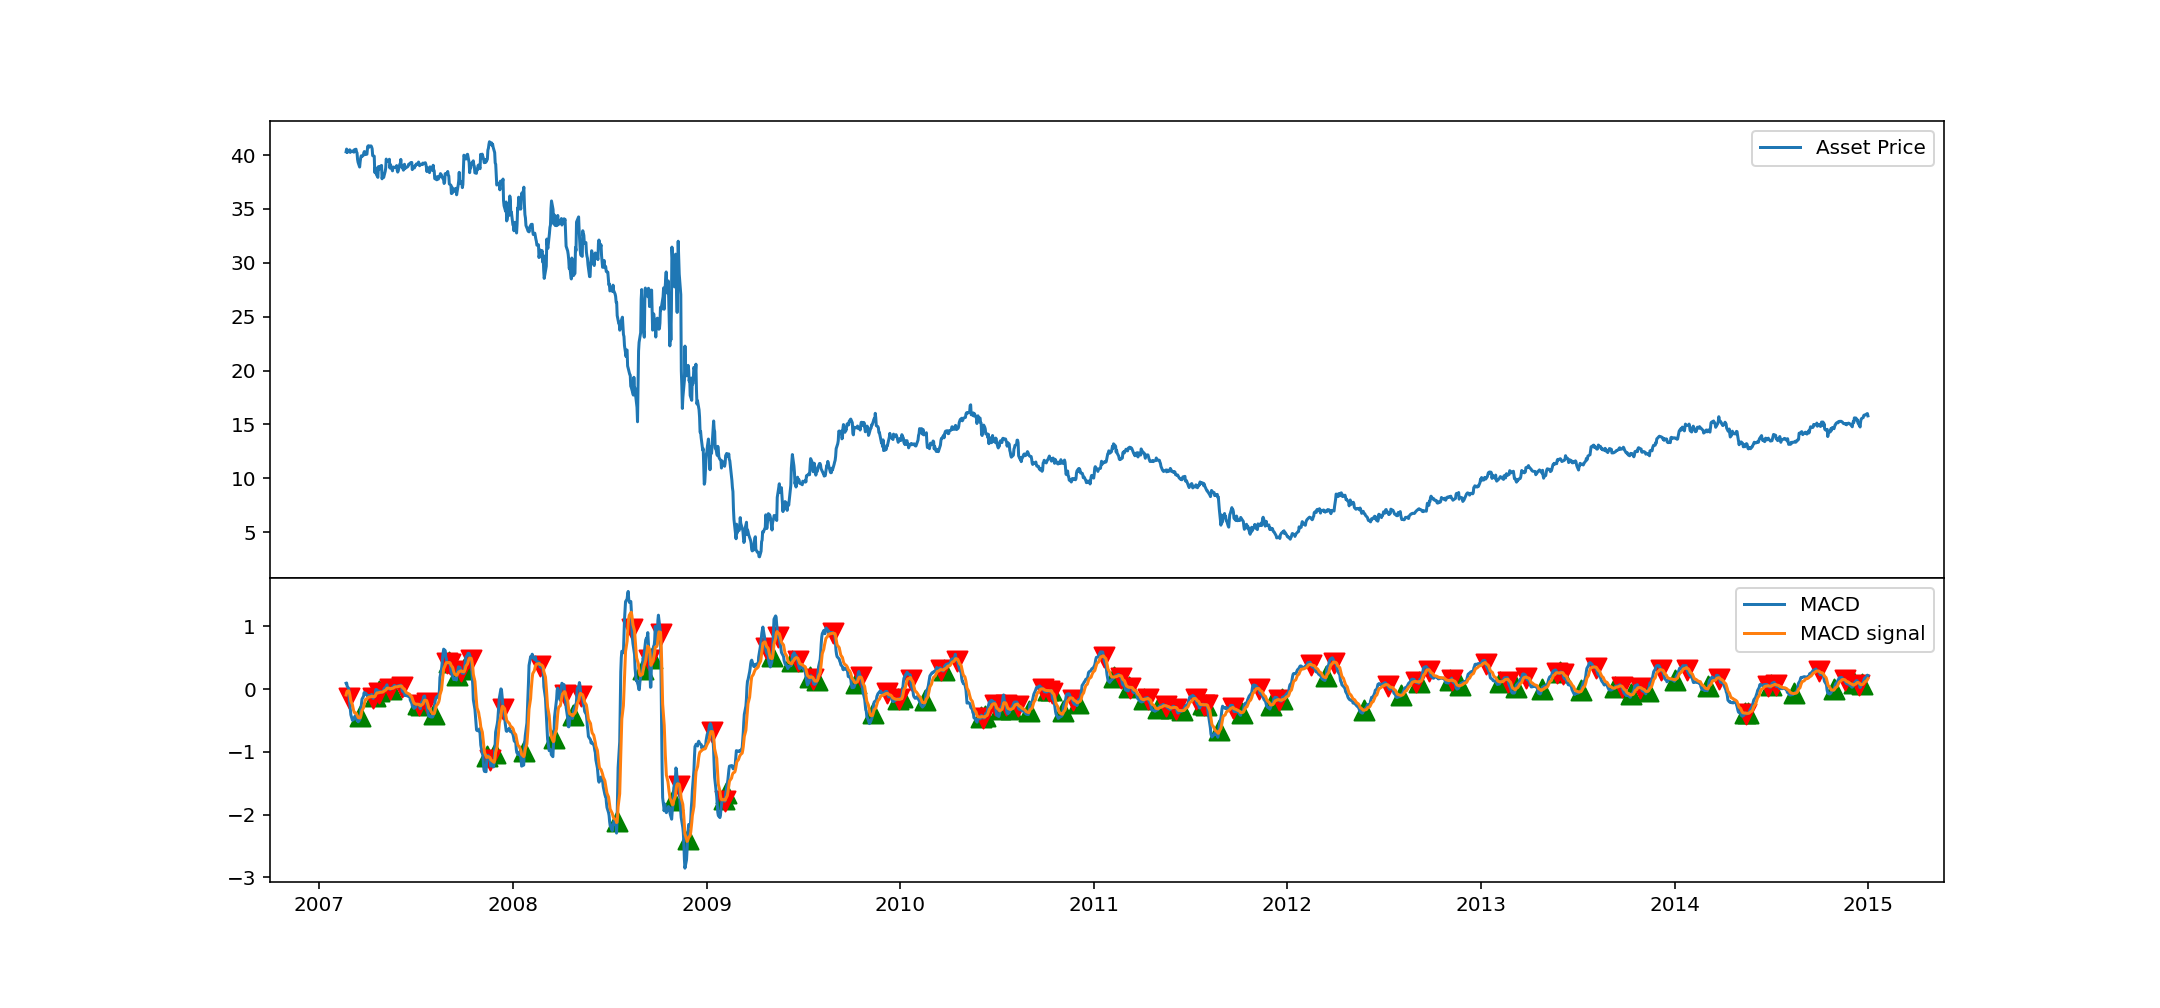
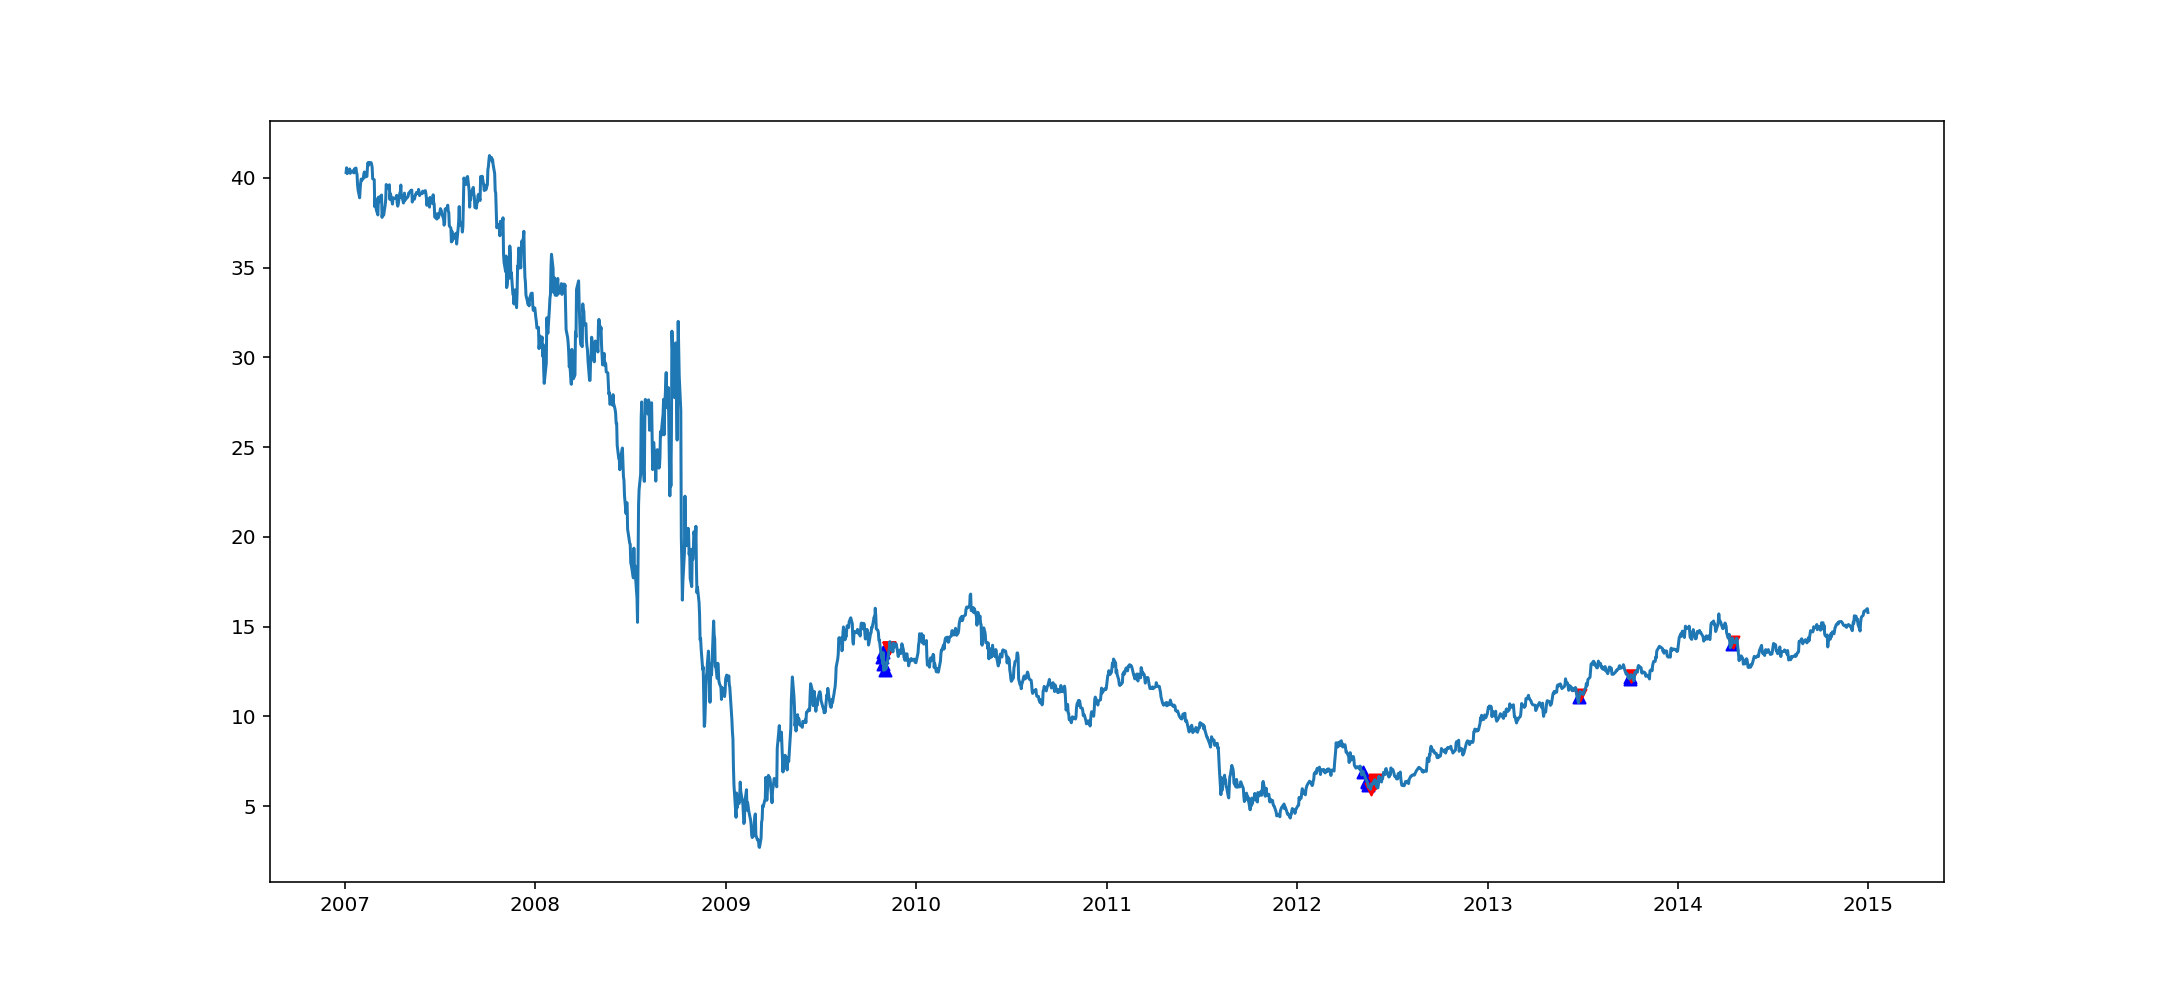
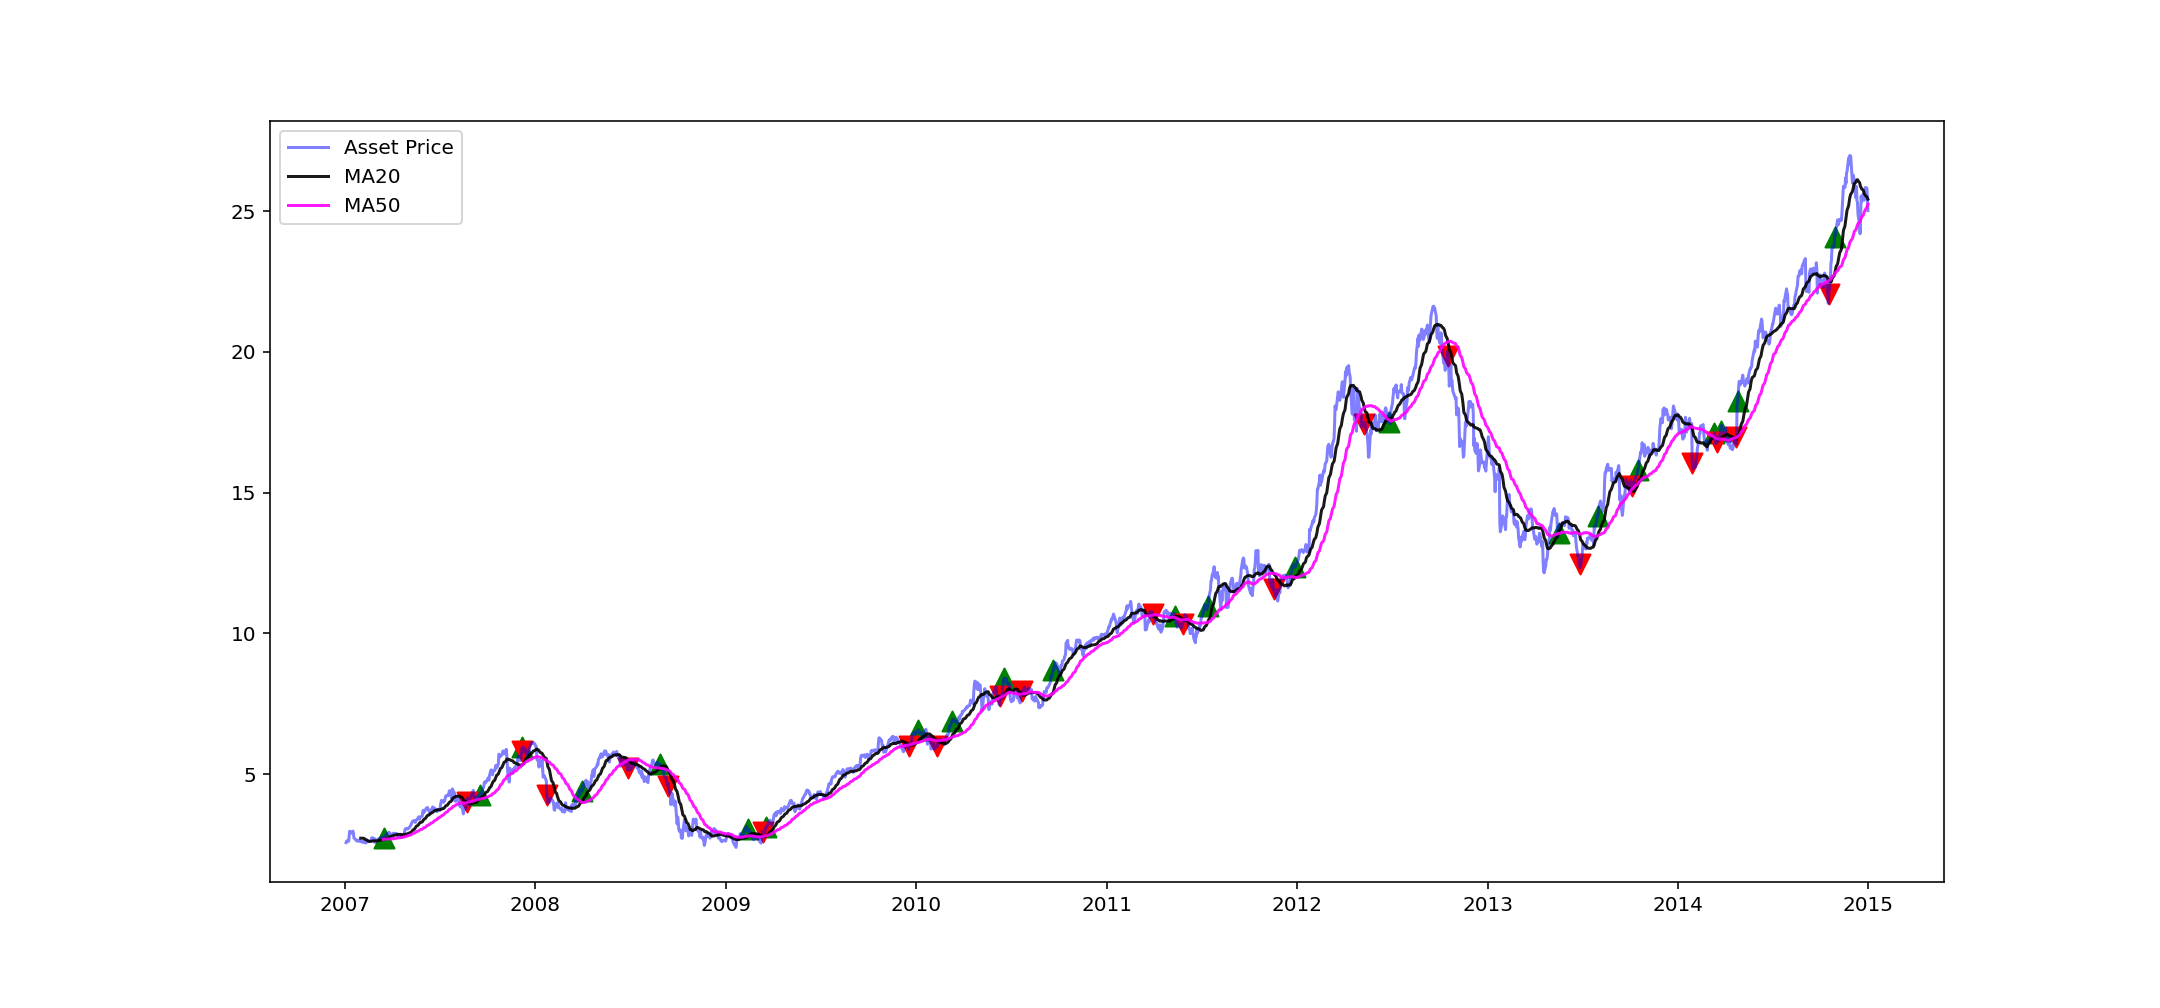
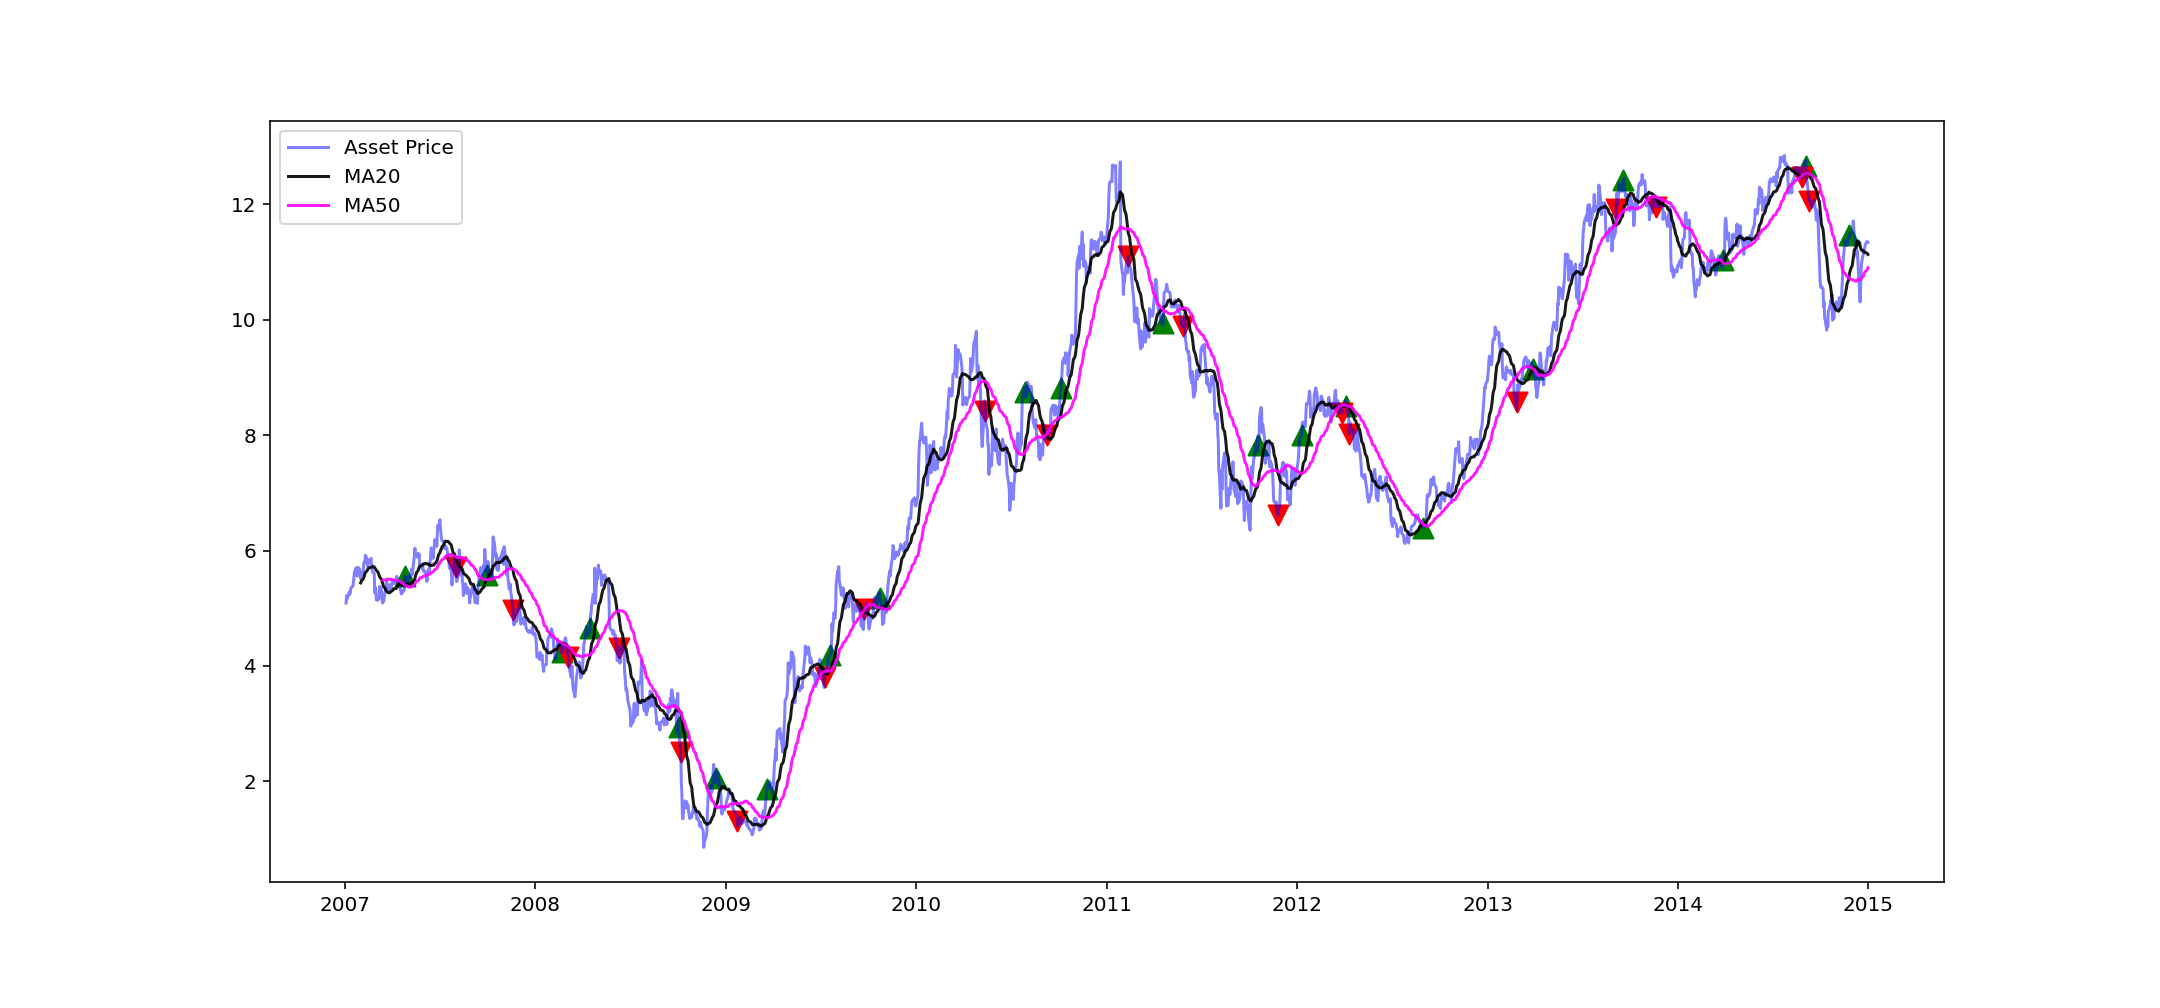
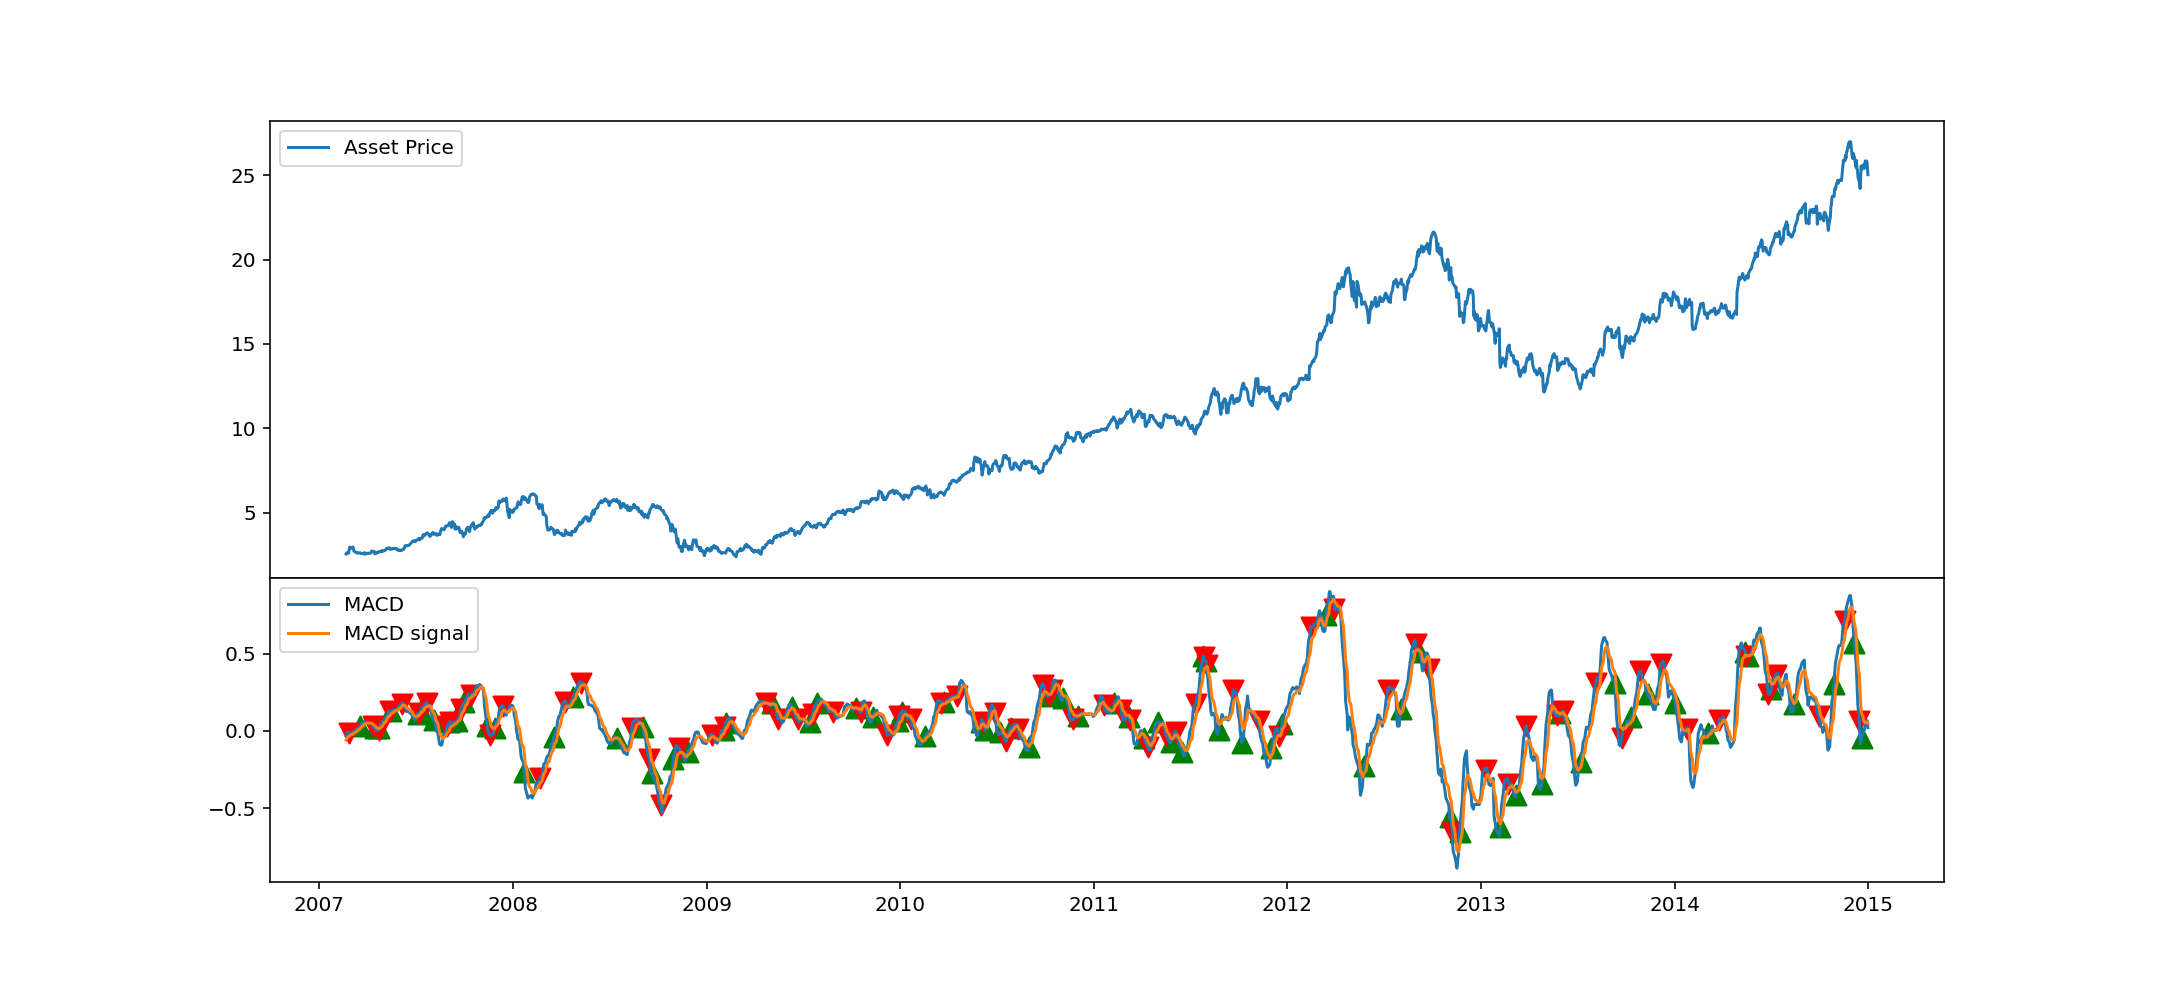
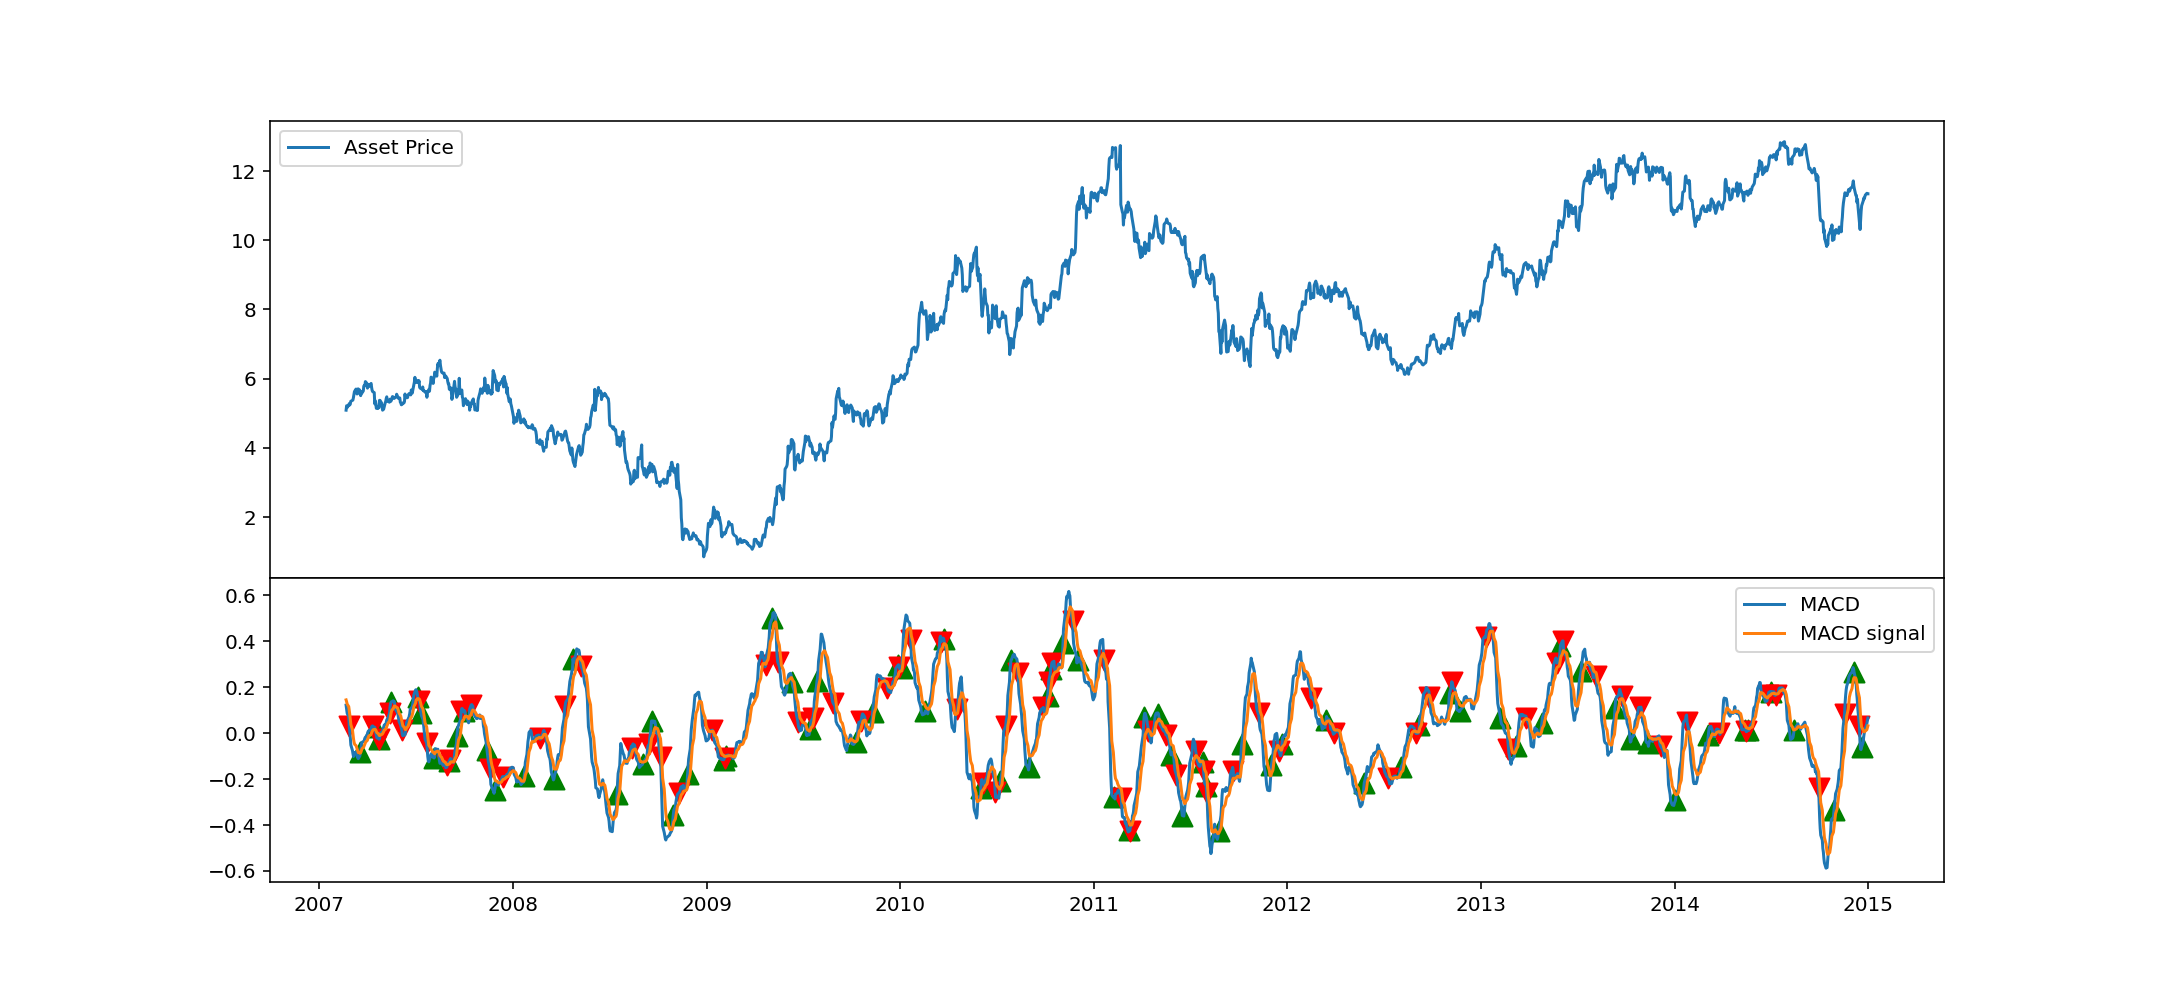
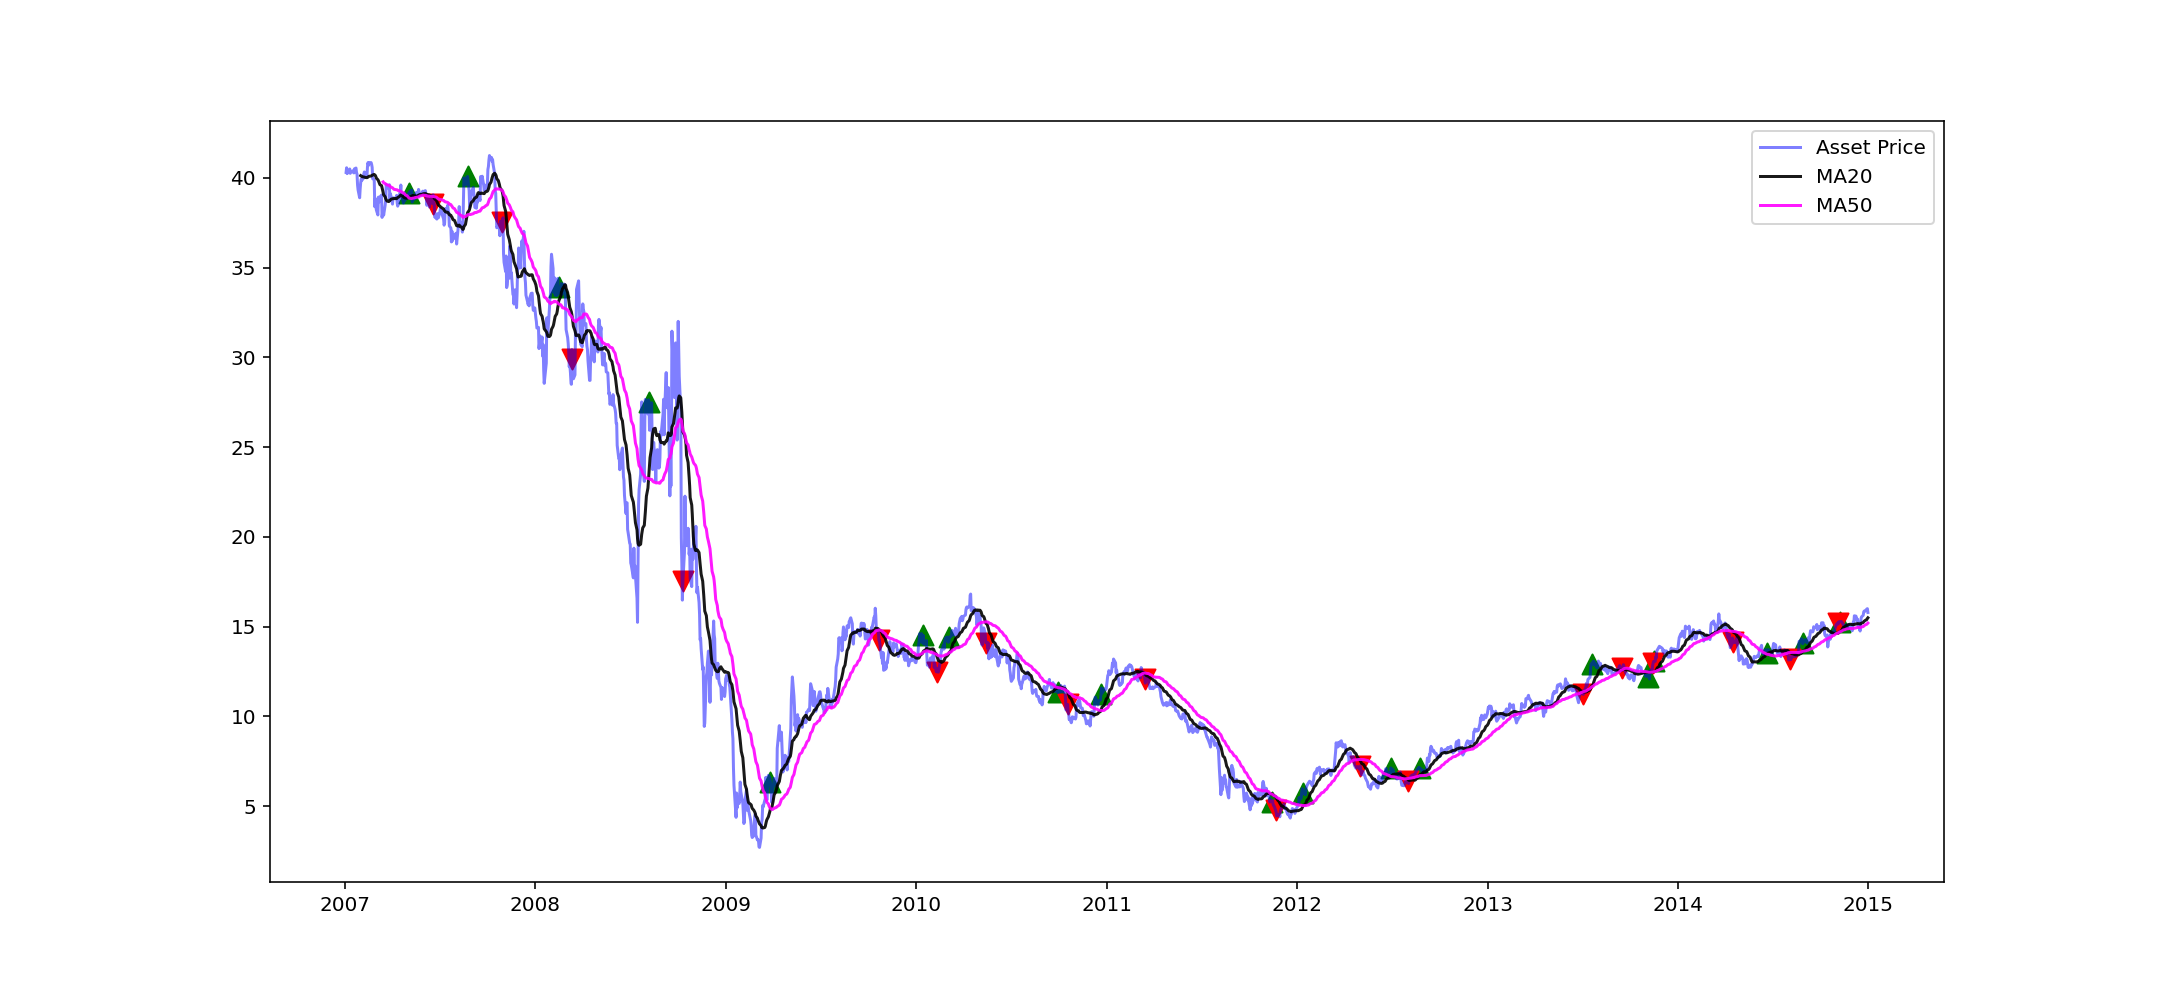
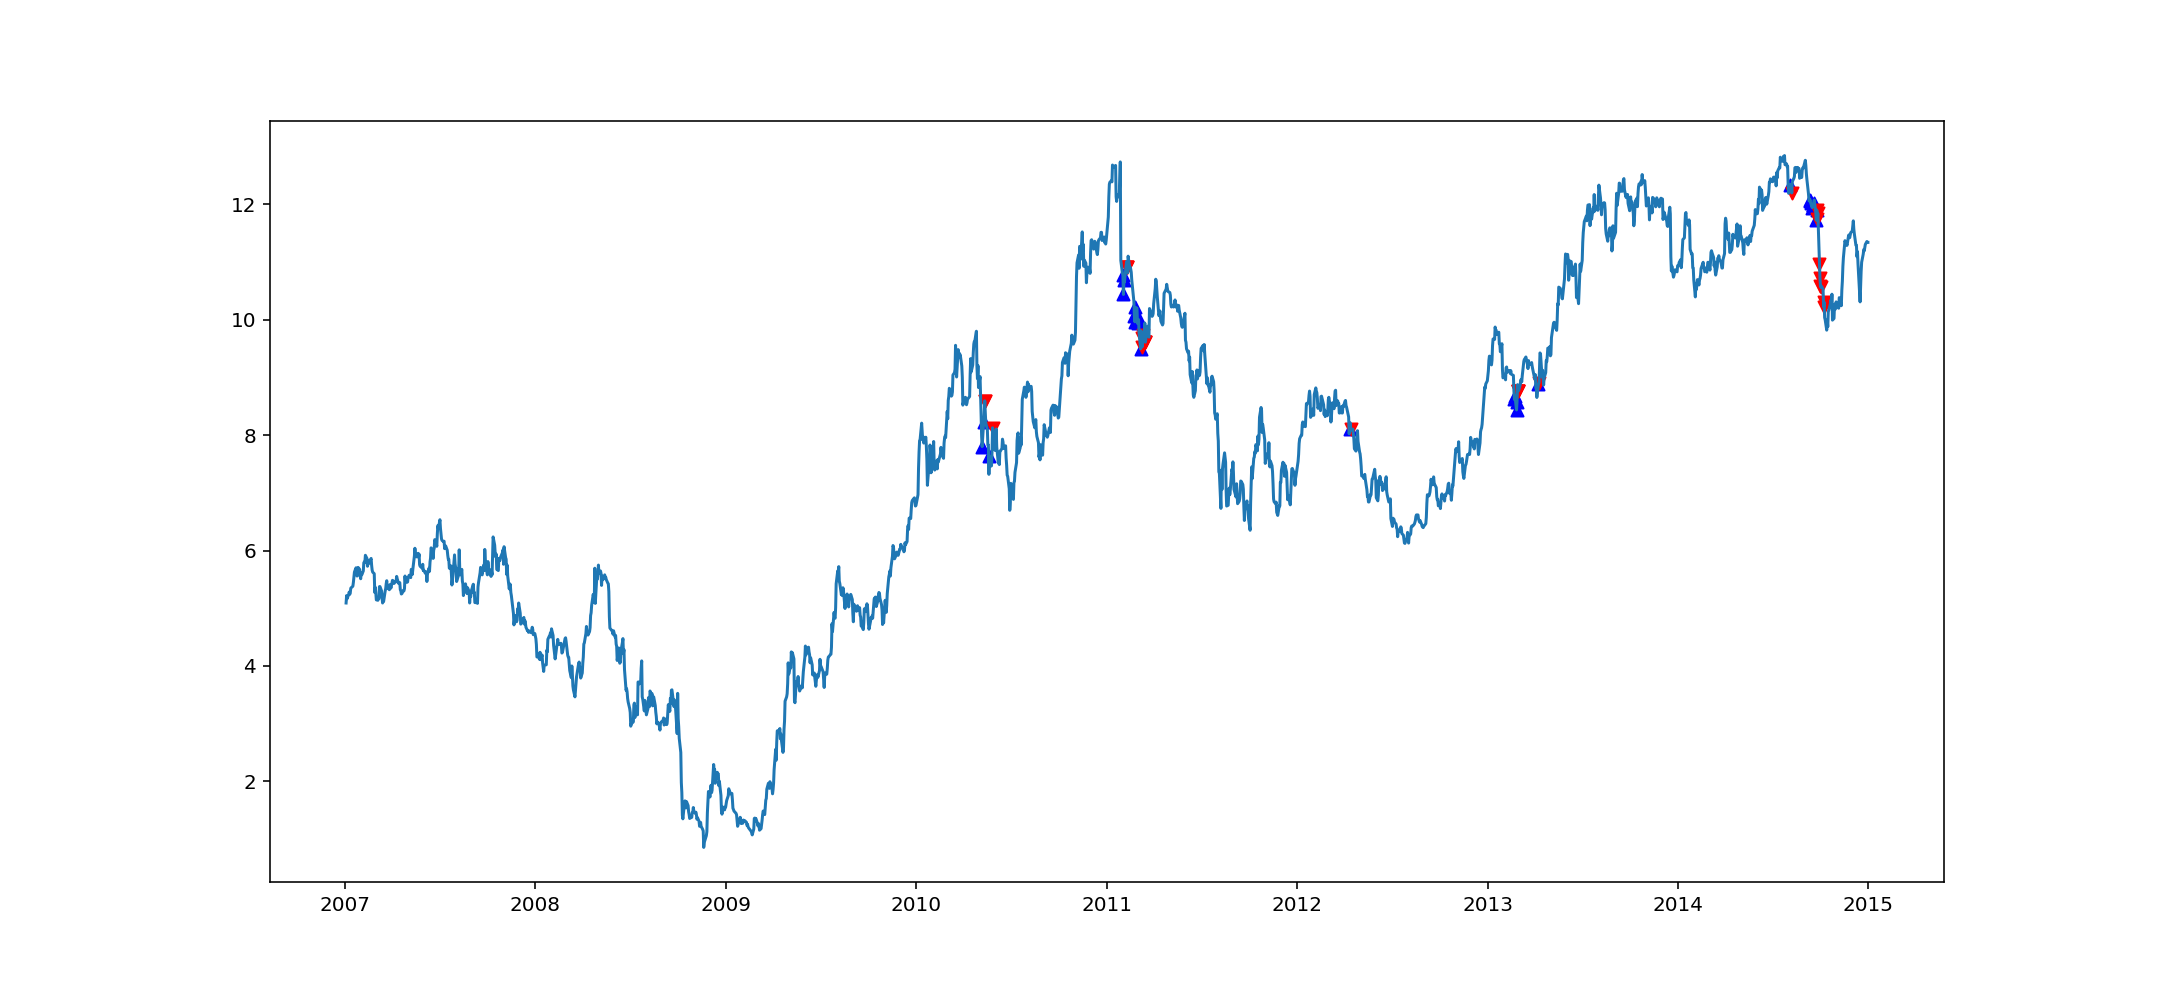

In [107]:
#Dashboard

apple_col = pn.Column(apple_sma(), apple_macd(), apple_rsi())
ford_col = pn.Column(ford_sma(), ford_macd(), ford_rsi())
bac_col = pn.Column(bac_sma(), bac_macd(), bac_rsi())
return_col = pn.Column(returns[0].hvplot.bar(title='Apple Return', height=400),
                    returns[1].hvplot.bar(title='Ford Return', height=400),
                    returns[2].hvplot.bar(title='Bank of America Return', height=400))
win_col = pn.Column(wins[0].hvplot.bar(title='Apple Win Rate', height=400),
                wins[1].hvplot.bar(title='Ford Win Rate', height=400),
                wins[2].hvplot.bar(title='Bank of America Win Rate', height=400))

tabs = pn.Tabs(('Apple with Buy/Sell signals', apple_col), 
               ('Ford with Buy/Sell signals', ford_col),
               ('Bank of America with Buy/Sell signals', bac_col),
               ('Comparing returns for strategies', return_col), 
               ('Comparing win rates for strategies', win_col))

tabs